<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Principal-Component-Analysis-(PCA)-Pragmatics" data-toc-modified-id="Principal-Component-Analysis-(PCA)-Pragmatics-1">Principal Component Analysis (PCA) Pragmatics</a></span></li><li><span><a href="#Learning-Outcomes" data-toc-modified-id="Learning-Outcomes-2">Learning Outcomes</a></span></li><li><span><a href="#How-do-you-pick-number-of-components?" data-toc-modified-id="How-do-you-pick-number-of-components?-3">How do you pick number of components?</a></span></li><li><span><a href="#Screeplot:-Variance-by-number-of-components" data-toc-modified-id="Screeplot:-Variance-by-number-of-components-4">Screeplot: Variance by number of components</a></span></li><li><span><a href="#Caution-About-Small-Eigenvalues" data-toc-modified-id="Caution-About-Small-Eigenvalues-5">Caution About Small Eigenvalues</a></span></li><li><span><a href="#PCA-Tips" data-toc-modified-id="PCA-Tips-6">PCA Tips</a></span></li><li><span><a href="#PCA-Can-Anonymize-Features" data-toc-modified-id="PCA-Can-Anonymize-Features-7">PCA Can Anonymize Features</a></span></li><li><span><a href="#Check-for-understanding:" data-toc-modified-id="Check-for-understanding:-8">Check for understanding:</a></span></li><li><span><a href="#Does-PCA-change-the-number-of-observations?" data-toc-modified-id="Does-PCA-change-the-number-of-observations?-9">Does PCA change the number of observations?</a></span></li><li><span><a href="#Is-PCA-parametric-or-non-parametric-algorithm?" data-toc-modified-id="Is-PCA-parametric-or-non-parametric-algorithm?-10">Is PCA parametric or non-parametric algorithm?</a></span></li><li><span><a href="#What-are-the-limitations-of-PCA?" data-toc-modified-id="What-are-the-limitations-of-PCA?-11">What are the limitations of PCA?</a></span></li><li><span><a href="#Techniques-when-there-are-non-numeric-features" data-toc-modified-id="Techniques-when-there-are-non-numeric-features-12">Techniques when there are non-numeric features</a></span></li><li><span><a href="#What-is-the-relationship-between-PCA-and-Linear-Regression?" data-toc-modified-id="What-is-the-relationship-between-PCA-and-Linear-Regression?-13">What is the relationship between PCA and Linear Regression?</a></span></li><li><span><a href="#Technical-Difference-between-PCA-and-Linear-Regression-" data-toc-modified-id="Technical-Difference-between-PCA-and-Linear-Regression--14">Technical Difference between PCA and Linear Regression </a></span></li><li><span><a href="#Check-for-understanding" data-toc-modified-id="Check-for-understanding-15">Check for understanding</a></span></li><li><span><a href="#PCA-Anti-patterns" data-toc-modified-id="PCA-Anti-patterns-16">PCA Anti-patterns</a></span></li><li><span><a href="#1)-Planning-to-use-PCA-from-the-start-" data-toc-modified-id="1)-Planning-to-use-PCA-from-the-start--17">1) Planning to use PCA from the start </a></span></li><li><span><a href="#2)-Prevent-overfitting-by-having-fewer-features-" data-toc-modified-id="2)-Prevent-overfitting-by-having-fewer-features--18">2) Prevent overfitting by having fewer features </a></span></li><li><span><a href="#3)-Clustering" data-toc-modified-id="3)-Clustering-19">3) Clustering</a></span></li><li><span><a href="#PCA-vs-Other-Techniques" data-toc-modified-id="PCA-vs-Other-Techniques-20">PCA vs Other Techniques</a></span></li><li><span><a href="#Takeaways" data-toc-modified-id="Takeaways-21">Takeaways</a></span></li><li><span><a href="#Bonus-Material" data-toc-modified-id="Bonus-Material-22">Bonus Material</a></span></li><li><span><a href="#Limitations-of-the-PCA-method" data-toc-modified-id="Limitations-of-the-PCA-method-23">Limitations of the PCA method</a></span></li><li><span><a href="#Dimensionality-Reduction-With-Kernel-PCA" data-toc-modified-id="Dimensionality-Reduction-With-Kernel-PCA-24">Dimensionality Reduction With Kernel PCA</a></span></li><li><span><a href="#What-happens-with-multicollinearity-&amp;-PCA?" data-toc-modified-id="What-happens-with-multicollinearity-&amp;-PCA?-25">What happens with multicollinearity &amp; PCA?</a></span></li><li><span><a href="#Should-one-remove-highly-correlated-variables-before-doing-PCA?" data-toc-modified-id="Should-one-remove-highly-correlated-variables-before-doing-PCA?-26">Should one remove highly correlated variables before doing PCA?</a></span></li><li><span><a href="#-What-happens-if-you-apply-PCA-twice?" data-toc-modified-id="-What-happens-if-you-apply-PCA-twice?-27"> What happens if you apply PCA twice?</a></span></li></ul></div>

<center><h2>Principal Component Analysis (PCA) Pragmatics</h2></center>

<center><img src="../images/iris.png" width="75%"/></center>

[Image Source](http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/112-pca-principal-component-analysis-essentials/)

<center><h2>Learning Outcomes</h2></center>

__By the end of this session, you should be able to__:

- Pick the number of components for Principal Component Analysis (PCA).
- Describe when to and _when not to_ PCA.
- Compare and contrast PCA to other Dimensionality Reduction techniques.

<center><h2>How do you pick number of components?</h2></center>

<br>
<br>

1. Look for inflection point (e.g., "elbow" method).
1. Set threshold for % of Variance (e.g., 85% of variance).

<center><h2>Screeplot: Variance by number of components</h2></center>

<center><img src="../images/scree.png" width="50%"/></center>



<center>Example of diminishing marginal returns. </center>

In [30]:
reset -fs

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from warnings import filterwarnings
filterwarnings('ignore')

palette = "Dark2"
%matplotlib inline

In [32]:
from sklearn import datasets

In [33]:
# Load the data
digits = datasets.load_digits()

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
# Standardize the feature matrix
X = StandardScaler().fit_transform(digits.data)

In [36]:
from sklearn.decomposition import PCA

In [37]:
# Create a PCA that will retain 99% of the variance
pca = PCA(n_components=0.99) # 👈 Pass in a float

# Conduct PCA
X_pca = pca.fit_transform(X)

In [38]:
print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features:  {X_pca.shape[1]}")

Original number of features: 64
Reduced number of features:  54


<center><h2>Caution About Small Eigenvalues</h2></center>

Eigenvalues less than 1.00 are not considered to be stable. 

They account for less variability than does a single variable. Should not be retained in the analysis. 

In [39]:
pca.explained_variance_.tolist()

[7.344776062836335,
 5.8354905373295285,
 5.1539611764188455,
 3.966235966587288,
 2.966345195093601,
 2.572044419320618,
 2.4060094135782006,
 2.0686735457465493,
 1.829933143826968,
 1.7895173923196808,
 1.6978461553340563,
 1.5728788868795178,
 1.3887078149450458,
 1.3593360885653964,
 1.321525359860906,
 1.1682917644675244,
 1.083686775249899,
 0.9997786171449689,
 0.9743829305689521,
 0.9089124184577166,
 0.8227192644558202,
 0.7763101392595965,
 0.7115567531171383,
 0.6455236480610025,
 0.5952739876615569,
 0.5765017972018529,
 0.5267315516205461,
 0.5106363011725044,
 0.48686381297937137,
 0.4556010705278521,
 0.44285155170799295,
 0.4223008630061847,
 0.3991063025827602,
 0.3911011111763677,
 0.36094516801040166,
 0.3486030588718657,
 0.31959630000067585,
 0.2940662706200288,
 0.2769228513803105,
 0.2582730040151318,
 0.2478302860350354,
 0.24235660038291548,
 0.2175819956045897,
 0.2079959268999441,
 0.20009090171636815,
 0.18983516452770657,
 0.17612894217338015,
 0.168752358

Girden, E. R. (2001). Evaluating research articles from start to finish. Thousand Oaks, Calif., Sage Publications.

[Source](https://books.google.com/books?id=-3ZsyqzKLQwC&pg=PA157&lpg=PA157&dq=Those+with+eigenvalues+less+than+1.00+are+not+considered+to+be+stable.&source=bl&ots=CaUYqACrMO&sig=er1qRkGtj-TAtJltkYSP7YZU8gQ&hl=en&sa=X&ved=2ahUKEwi0kPaY7f_eAhWp7IMKHcrGDZQQ6AEwAXoECAgQAQ#v=onepage&q=Those%20with%20eigenvalues%20less%20than%201.00%20are%20not%20considered%20to%20be%20stable.&f=false)

<center><h2>PCA Tips</h2></center>


PCA works best with:

- More than 250 samples
- More than 10 features

Source: 

- https://datascience.stackexchange.com/questions/17216/pca-before-k-mean-clustering/17222
- https://www.analyticsvidhya.com/blog/2016/03/practical-guide-principal-component-analysis-python/

<center><h2>PCA Can Anonymize Features</h2></center>

Examples:

- Credit card fraud dataset
- Brain signals

<center><h2>Check for understanding:</h2></center>
<br>

In small groups, answer the following questions:

1. Does PCA change the number of observations?

2. Is PCA a parametric or non-parametric algorithm? Why?

3. What are the limitations of PCA?

4. Linear Regression tries to find a line of best fit. How is that similar or different from what PCA does? (Hint - draw a picture of the residuals)

<center><h2>Does PCA change the number of observations?</h2></center>


<br>
<br>

No - PCA does not change the number of observations you have.  PCA just reduces dimensionality. 

$p$ goes down. $n$ stays the same.

<center><h2>Is PCA parametric or non-parametric algorithm?</h2></center>

<br>
<br>

PCA is non-parametric. 

PCA does __not__ make any assumptions about the data distribution has a specific (fixed) functional form. For example, it works equally well with normally distributed, exponentially distributed, double Laplacian, and any other kind of distribution.

[Source](https://stats.stackexchange.com/questions/200410/is-principal-component-analysis-a-parametric-method)

<center><h2>What are the limitations of PCA?</h2></center>


<br>
<br>

- Manually set or tune the number of dimensions.
- The new principal components are not directly interpretable. 
- Not appropriate for non-numeric features.

<center><h2>Techniques when there are non-numeric features</h2></center>

[MCA (Multiple correspondence analysis)](https://en.wikipedia.org/wiki/Multiple_correspondence_analysis) and Categorical Principal Components Analysis (CATPCA) for purely categorical features.

[Examples of PCA for ordinal or binary data](https://stats.stackexchange.com/questions/215404/is-there-factor-analysis-or-pca-for-ordinal-or-binary-data)

[Multiple Factor Analysis (MFA)](https://en.wikipedia.org/wiki/Multiple_factor_analysis) which works for datasets that have both numerical and categorical features.

<center><h2>What is the relationship between PCA and Linear Regression?</h2></center>

<br>

<center><b>NOTHING!</b></center>
<br>

PCA is a unsupervised technique that tries to find the best orthogonal representations to project the data. PCA does not distinguish between independent and dependent variables.

Linear Regression defines one variable as dependent and tries to find the linear relationship between a dependent variable and one or more independent variables.

<center><h2>Technical Difference between PCA and Linear Regression </h2></center>

<center><img src="../images/OLS1.png" width="45%"/></center>

<center>Best fit line for X predicting Y </center>

<center><img src="../images/OLS2.png" width="45%"/></center>

<center>Best fit line for Y predicting X </center>

<center><img src="../images/pca.png" width="55%"/></center>

<center>PCA projection</center>

<center><img src="../images/pca_projection.png" width="75%"/></center>

 [Image Source](https://cerebralmastication.com/2010/09/principal-component-analysis-pca-vs-ordinary-least-squares-ols-a-visual-explination/)

Sources:

- [Visual Explanation #1](https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues/2700#2700)
- [Visual explanation #2](https://shankarmsy.github.io/posts/pca-vs-lr.html)
- [Technical explanation](https://math.stackexchange.com/questions/684336/connection-between-pca-and-linear-regression)


<center><h2>Check for understanding</h2></center>

What is the 1st Principle Component for this data?

In [40]:
X = np.random.multivariate_normal(mean=np.zeros(2), 
                                  cov=[[.5, 0], 
                                       [0, .5]], 
                                  size=1_000)

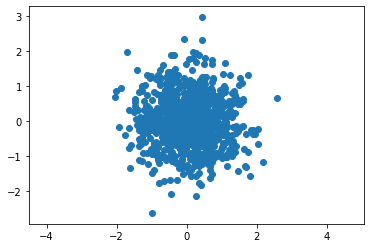

In [41]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Unclear - since the data has radial symmetry.

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [43]:
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2).fit(X);

In [44]:
print(" Component #1: {:>6.2%} \n Component #2: {:>6.2%}"
      .format(*pca.explained_variance_ratio_))

 Component #1: 51.97% 
 Component #2: 48.03%


All the components are about the same.

In [45]:
from draw_vector import draw_vector

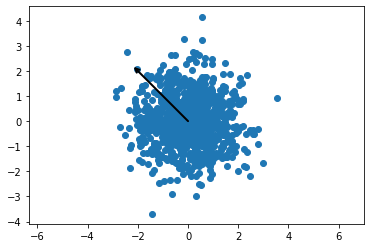

In [46]:
# Plot data
plt.scatter(X[:, 0], X[:, 1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, plt)
    break # Plot just the 1st component
plt.axis('equal');

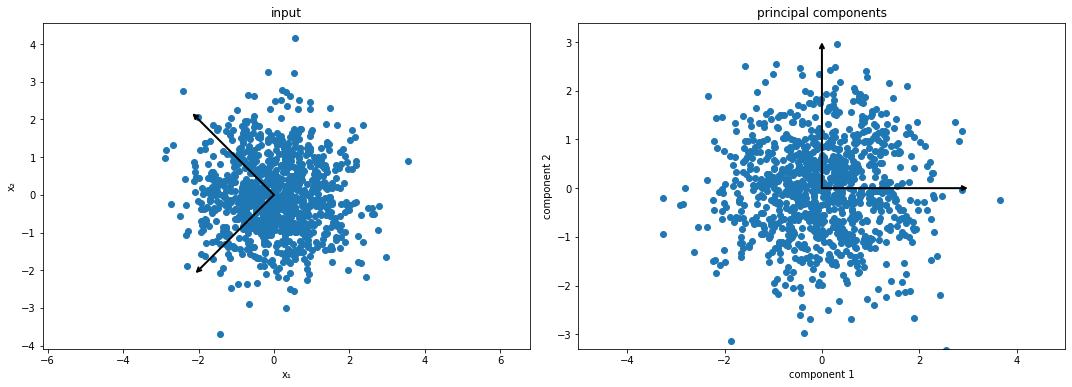

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6)); fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plot data
ax[0].scatter(X[:, 0], X[:, 1])
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length); draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal'); ax[0].set(xlabel='x₁', ylabel='x₂', title='input');

# plot principal components
X_pca = pca.transform(X); ax[1].scatter(X_pca[:, 0], X_pca[:, 1]); draw_vector([0, 0], [0, 3], ax=ax[1]); draw_vector([0, 0], [3, 0], ax=ax[1]); ax[1].axis('equal');ax[1].set(xlabel='component 1', ylabel='component 2', title='principal components', xlim=(-5, 5), ylim=(-3, 3.1));

<center><h2>PCA Anti-patterns</h2></center>
<br>
<br>

1. Planning to use PCA from the start.  
1. Prevent overfitting by reducing number of features.   
1. Using PCA to cluster. 

<center><h2>1) Planning to use PCA from the start </h2></center>
<br>
<br>

First, model the raw data to get baseline.

Then see if PCA improves that baseline. 

<center><h2>2) Prevent overfitting by having fewer features </h2></center>
<br>
<br>

Do __not__ use PCA to prevent overfiting.

Use appropriate regularization to prevent overfitting.

PCA does not use target information. Most methods of regularization are weighted by ability to predict targets.

<center><h2>3) Clustering</h2></center>
<br>
<br>
<br>

PCA does not create clusters.

Use a clustering technique (e.g., k-means).

<center><h2>PCA vs Other Techniques</h2></center>

PCA is a linear dimensionality reduction method. Adept at preserving global structure.

Nonlinear dimensionality reduction methods are better at representing local interactions.

Non-linear dimensionality reduction techniques:

- Kernel PCA
- Sammon’s Mapping
- Multidimensional scaling
- Isomap

[Source](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1006907)

<center><h2>Takeaways</h2></center>

- Pick the number of components for Principal Component Analysis (PCA) with either:
    + The elbow method of the scree plot.
    + Pick % of variance wanted.
- PCA works best with medium to large data.
- PCA is a nonparametric, linear technique.

Bonus Material
-----

<center><h2>Limitations of the PCA method</h2></center>

- PCA is a linear projection method and it could fail (e.g., lead you to wrong conclusions) on some datasets;
- variance maximization sometimes does not lead to the desired outcome;
the results of PCA depend on the scaling of variables in the vector \mathbf{x}x;
- it could be difficult (or impossible) to provide physically meaningful interpretation of generated projections;
- the orthogonality of projection directions can be restrictive as the informative dimensions do not necessarily have to be orthogonal to each other;
- it is potentially computationally demanding to compute.

[Source](https://nenadmarkus.com/p/tutorial-on-pca/)

<center><h2>Dimensionality Reduction With Kernel PCA</h2></center>

<center><img src="https://chrisalbon.com/../images/machine_learning_flashcards/Kernel_PCA_print.png" width="75%"/></center>    

[Source](https://chrisalbon.com/machine_learning/feature_engineering/dimensionality_reduction_with_kernel_pca/)

What happens with multicollinearity & PCA?
-----

In [48]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [49]:
X = load_iris().data
X_double = np.hstack((X, X)) # Repeat each feautre
print(X.shape)
print(X_double.shape)

(150, 4)
(150, 8)


In [50]:
# Regular
X_std = StandardScaler().fit_transform(X)
pca = PCA(n_components=X.shape[1]).fit(X_std)

# PCA learns to multicollinearity
for var_ratio in pca.explained_variance_ratio_:
    print(f"{var_ratio:>6.2%}") 

72.96%
22.85%
 3.67%
 0.52%


In [51]:
# Multicollinearity
X_double_std = StandardScaler().fit_transform(X_double)
pca = PCA(n_components=X_double_std.shape[1]).fit(X_double_std)

# PCA learns to ignore multicollinearity.
# In other words, those features have no unique variance to contribute to the projection.
for var_ratio in pca.explained_variance_ratio_:
    print(f"{var_ratio:>6.2%}") 

72.96%
22.85%
 3.67%
 0.52%
 0.00%
 0.00%
 0.00%
 0.00%


<center><h2>Should one remove highly correlated variables before doing PCA?</h2></center>

> there may be merit in discarding variables thought to be measuring the same underlying (but "latent") aspect of a collection of variables, because including the nearly-redundant variables can cause the PCA to overemphasize their contribution. There is nothing mathematically right (or wrong) about such a procedure.

[Source](https://stats.stackexchange.com/questions/50537/should-one-remove-highly-correlated-variables-before-doing-pca)

 What happens if you apply PCA twice?
-----

In [52]:
X = load_iris().data

In [53]:
# First round of PCA
X_std = StandardScaler().fit_transform(X)
pca_first = PCA(n_components=X_std.shape[1]).fit(X_std)
X_pca_first = pca_first.transform(X_std)
for var_ratio in pca_first.explained_variance_ratio_:
    print(f"{var_ratio:>6.2%}")

72.96%
22.85%
 3.67%
 0.52%


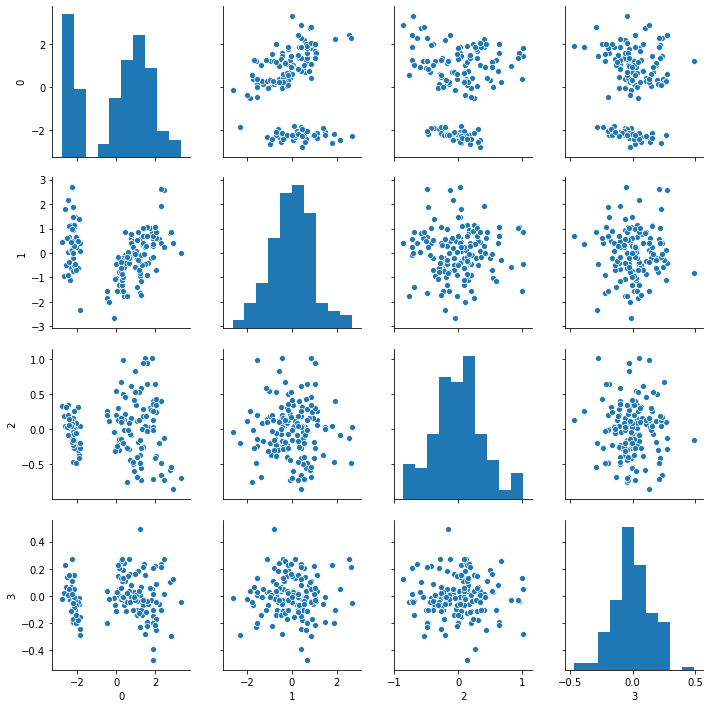

In [54]:
sns.pairplot(pd.DataFrame(X_pca_first), size=2.5, palette=palette);

In [55]:
# 2nd round of PCA (Do it again)
X_std_second = StandardScaler().fit_transform(X_pca_first)
pca_second = PCA(n_components=X_std_second.shape[1]).fit(X_std_second)
X_pca_second = pca_second.transform(X_std_second)
for var_ratio in pca_second.explained_variance_ratio_:
    print(f"{var_ratio:>6.2%}")

25.00%
25.00%
25.00%
25.00%


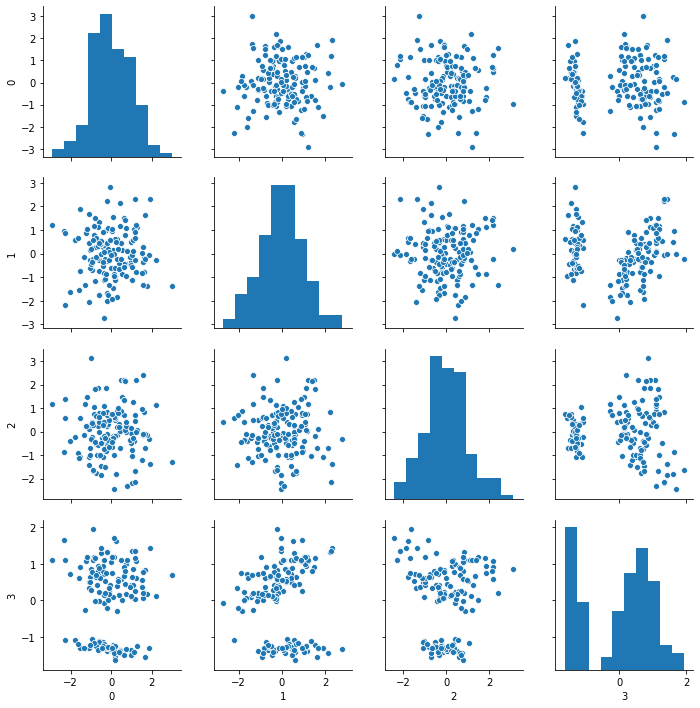

In [56]:
sns.pairplot(pd.DataFrame(X_pca_second), size=2.5, palette=palette);

After applying PCA twice, we end up with the radical symmetry issue.

It is not useful to apply PCA twice.